In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import zipfile

In [8]:
z=zipfile.ZipFile(r"C:\Users\Ganesh prasad sahoo\OneDrive\Documents\Downloads\archive (67).zip")
z.extractall()

In [10]:
import os

root_folder = r"D:\All_DataSet2\Leaf Classification\Plants_2\train"
for foldername in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, foldername) 

    if os.path.isdir(folder_path):
        count = 1

        for filename in os.listdir(folder_path):
            source = os.path.join(folder_path, filename)
            destination = os.path.join(folder_path, f"{foldername}_{count}.jpg")
            os.rename(source, destination)
            count += 1

print("Renaming complete")


Renaming complete


In [13]:
import os

root_folder = r"D:\All_DataSet2\Leaf Classification\Plants_2\train"
image_extensions = {".jpg", ".jpeg", ".png", ".gif", ".bmp"}  # Add more extensions if needed
total_images = 0

for foldername in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, foldername)  # Correctly joining root_folder and foldername

    if os.path.isdir(folder_path):
        img_cnt = len([filename for filename in os.listdir(folder_path)
                       if os.path.splitext(filename)[1].lower() in image_extensions])
        total_images += img_cnt
        print(f"Folder '{foldername}' contains {img_cnt} image(s).")

print(f"Total images across all folders: {total_images}")


Folder 'Alstonia Scholaris diseased (P2a)' contains 244 image(s).
Folder 'Alstonia Scholaris healthy (P2b)' contains 168 image(s).
Folder 'Arjun diseased (P1a)' contains 222 image(s).
Folder 'Arjun healthy (P1b)' contains 210 image(s).
Folder 'Bael diseased (P4b)' contains 107 image(s).
Folder 'Basil healthy (P8)' contains 137 image(s).
Folder 'Chinar diseased (P11b)' contains 110 image(s).
Folder 'Chinar healthy (P11a)' contains 93 image(s).
Folder 'Gauva diseased (P3b)' contains 131 image(s).
Folder 'Gauva healthy (P3a)' contains 267 image(s).
Folder 'Jamun diseased (P5b)' contains 335 image(s).
Folder 'Jamun healthy (P5a)' contains 268 image(s).
Folder 'Jatropha diseased (P6b)' contains 114 image(s).
Folder 'Jatropha healthy (P6a)' contains 123 image(s).
Folder 'Lemon diseased (P10b)' contains 67 image(s).
Folder 'Lemon healthy (P10a)' contains 149 image(s).
Folder 'Mango diseased (P0b)' contains 255 image(s).
Folder 'Mango healthy (P0a)' contains 159 image(s).
Folder 'Pomegranate d

In [15]:
label=["Alstonia Scholaris diseased","Alstonia Scholaris healthy","Arjun diseased","Arjun healthy","Bael diseased","Basil healthy","Chinar diseased","Chinar healthy","Gauva diseased","Gauva healthy","Jamun diseased","Jamun healthy","Jatropha diseased","Jatropha healthy","Lemon diseased","Lemon healthy","Mango diseased","Mango healthy","Pomegranate diseased","Pomegranate healthy","Pongamia Pinnata diseased","Pongamia Pinnata healthy"]
len(label)

22

In [16]:
import tensorflow
from tensorflow import keras 
from keras import Sequential 
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [17]:
conv_base=VGG16(
  weights="imagenet",
  include_top=False,
  input_shape=(150,150,3)
)

In [19]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

model=Sequential()
model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation="relu"))
model.add(Dense(22,activation="softmax"))

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,851,670 (56.65 MB)

 Trainable params: 136,982 (535.09 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [30]:
conv_base.trainable=False

In [31]:
train_ds=keras.utils.image_dataset_from_directory(
  directory=r"D:\All_DataSet2\Leaf Classification\Plants_2\train",
  labels="inferred",
  label_mode="int",
  batch_size=32,
  image_size=(150,150)
)

validation_ds=keras.utils.image_dataset_from_directory(
  directory=r"D:\All_DataSet2\Leaf Classification\Plants_2\test",
  labels="inferred",
  batch_size=32,
  label_mode='int',
  image_size=(150,150)
)

Found 4274 files belonging to 22 classes.
Found 110 files belonging to 22 classes.


In [32]:
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [35]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [36]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.2729 - loss: 2.5303 - val_accuracy: 0.4636 - val_loss: 1.6716
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.6127 - loss: 1.3537 - val_accuracy: 0.5364 - val_loss: 1.2716
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.6891 - loss: 1.0443 - val_accuracy: 0.5818 - val_loss: 1.0701
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.7285 - loss: 0.8931 - val_accuracy: 0.6636 - val_loss: 0.9939
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.7584 - loss: 0.7978 - val_accuracy: 0.6455 - val_loss: 0.8683
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.7837 - loss: 0.7208 - val_accuracy: 0.6727 - val_loss: 0.8639
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.7944 - loss: 0.6626 - val_accuracy: 0.7000 - val_loss: 0.8372
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.8067 - loss: 0.6109 - val_accu

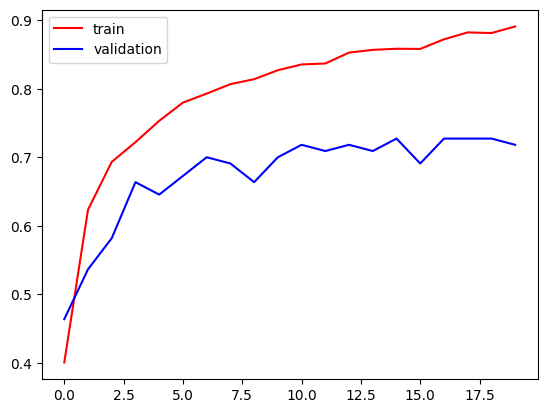

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

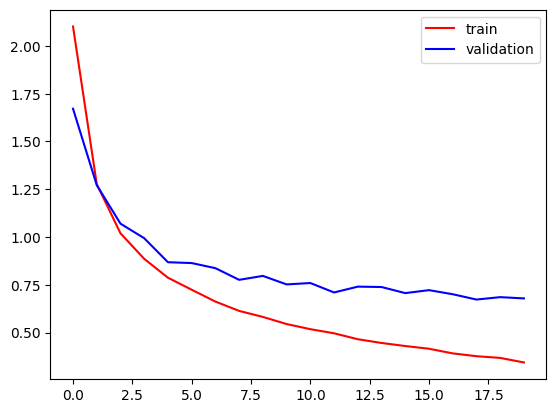

In [40]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [41]:
model.save("leafedetection.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("leafedetection.h5")

# Define the labels corresponding to the classes
labels = [
    "Alstonia Scholaris diseased", "Alstonia Scholaris healthy",
    "Arjun diseased", "Arjun healthy",
    "Bael diseased", "Basil healthy",
    "Chinar diseased", "Chinar healthy",
    "Gauva diseased", "Gauva healthy",
    "Jamun diseased", "Jamun healthy",
    "Jatropha diseased", "Jatropha healthy",
    "Lemon diseased", "Lemon healthy",
    "Mango diseased", "Mango healthy",
    "Pomegranate diseased", "Pomegranate healthy",
    "Pongamia Pinnata diseased", "Pongamia Pinnata healthy"
]

def preprocess_image(img_path):
    """Load and preprocess the image."""
    img = image.load_img(img_path, target_size=(150, 150))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0 
    return img_array

def classify_image(img_path):
    """Predict the class of the image."""
    img_array = preprocess_image(img_path)  

    try:
        predictions = model.predict(img_array) 

        predicted_class_index = np.argmax(predictions, axis=1)[0]

        return predicted_class_index
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Main code to run the classification
if __name__ == "__main__":
    # Path to the image you want to classify
    image_path = r'D:\All_DataSet2\Leaf Classification\Plants_2\train\Gauva diseased (P3b)\Gauva diseased (P3b)_1.jpg'  

    predicted_class = classify_image(image_path)
    if predicted_class is not None:
        print(f"The predicted class index is: {predicted_class}")
        print(f"The predicted class is: {labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
The predicted class index is: 8
The predicted class is: Gauva diseased
